In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import statsmodels.api as sm

In [62]:
df = pd.read_csv("datos.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


In [64]:
df = df[["LotArea", "OverallQual","YearBuilt","BedroomAbvGr","GarageCars","Artery", "SalePrice","PoolArea"]]

In [65]:
df

,LotArea,OverallQual,YearBuilt,BedroomAbvGr,GarageCars,Artery,SalePrice,PoolArea
0,8450,7,19,3,2,0,208500,0
1,9600,6,46,3,2,0,181500,0
2,11250,7,21,3,2,0,223500,0
3,9550,7,107,3,3,0,140000,0
4,14260,8,22,4,3,0,250000,0
...,...,...,...,...,...,...,...,...
1455,7917,6,23,3,2,0,175000,0
1456,13175,6,44,3,2,0,210000,0
1457,9042,7,81,4,1,0,266500,0
1458,9717,5,72,2,1,0,142125,0


In [66]:
df.describe()

,LotArea,OverallQual,YearBuilt,BedroomAbvGr,GarageCars,Artery,SalePrice,PoolArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,50.732192,2.866438,1.767123,0.032877,180921.195890,2.758904
std,9981.264932,1.382997,30.202904,0.815778,0.747315,0.178375,79442.502883,40.177307
min,1300.000000,1.000000,12.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,7553.500000,5.000000,22.000000,2.000000,1.000000,0.000000,129975.000000,0.000000
50%,9478.500000,6.000000,49.000000,3.000000,2.000000,0.000000,163000.000000,0.000000
75%,11601.500000,7.000000,68.000000,3.000000,2.000000,0.000000,214000.000000,0.000000
max,215245.000000,10.000000,150.000000,8.000000,4.000000,1.000000,755000.000000,738.000000


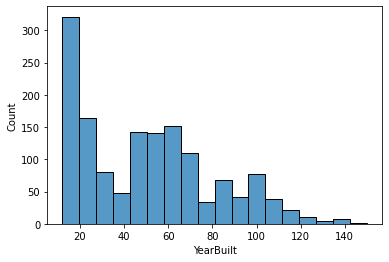

In [67]:
sns.histplot(x=df["YearBuilt"])

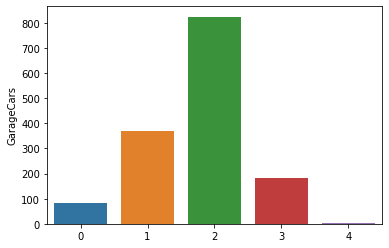

In [68]:
sns.barplot(x=df["GarageCars"].value_counts().index, y=df["GarageCars"].value_counts()) #discreto

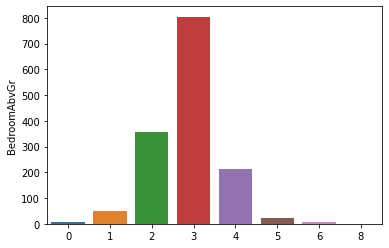

In [69]:
sns.barplot(x=df["BedroomAbvGr"].value_counts().index, y=df["BedroomAbvGr"].value_counts()) #discreto

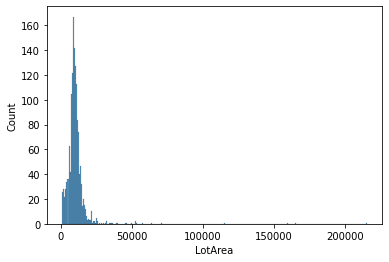

In [70]:
sns.histplot(x=df["LotArea"])

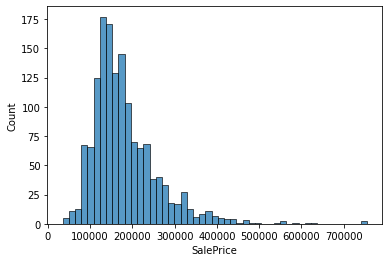

In [71]:
sns.histplot(x=df["SalePrice"])

In [72]:
q1 = df["LotArea"].quantile(.25)

In [73]:
q3 = df["LotArea"].quantile(.75)

In [74]:
IQR = q3 - q1

In [75]:
lim_inf = q1 - IQR*1.5

In [76]:
lim_sup = q3 + IQR*1.5

In [77]:
df = df [(df["LotArea"]>=lim_inf)&(df["LotArea"]<=lim_sup)]

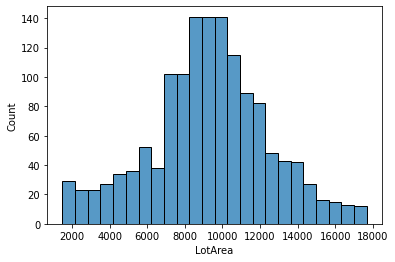

In [78]:
sns.histplot(x=df["LotArea"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


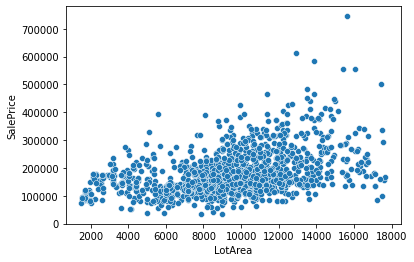

In [79]:
sns.scatterplot(df["LotArea"],df["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


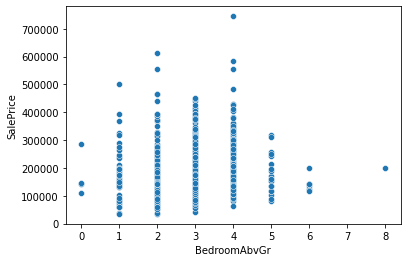

In [80]:
sns.scatterplot(df["BedroomAbvGr"],df["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


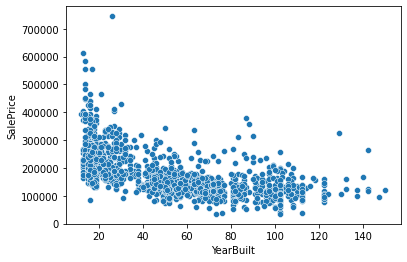

In [81]:
sns.scatterplot(df["YearBuilt"],df["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


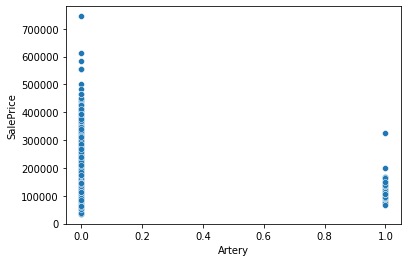

In [82]:
sns.scatterplot(df["Artery"],df["SalePrice"])

In [83]:
X = df.copy()
y = X.pop("SalePrice")
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     581.4
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:13:43   Log-Likelihood:                -16648.
No. Observations:                1391   AIC:                         3.331e+04
Df Residuals:                    1383   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.249e+04   7716.827    -11.985      0.000   -1.08e+05   -7.73e+04
LotArea          5.0756      0.354     14.322      0.000       4.380       5.771
OverallQual   3.241e+04   1033.877     31.350      0.000    3.04e+04    3.44e+04
YearBuilt     -227.1744     46.039     -4.934      0.000    -317.488    -136.860
BedroomAbvGr  2485.1216   1354.221      1.835      0.067    -171.428    5141.672
GarageCars    1.756e+04   1878.141      9.352      0.000    1.39e+04    2.12e+04
Artery       -1.618e+04   6040.802     -2.678      0.008    -2.8e+04   -4325.287
PoolArea       154.7085     33.349      4.639      0.000      89.288     220.129
==============================================================================
Omnibus:                      546.487   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4580.791
Skew:                           1.599   Prob(JB):                         0.00
Kurtosis:                      11.295   Cond. No.                     7.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
reg.params["Artery"] # Relacion lin-lin, cuando se pasa a vivir en la arteria se disminuye el precio del inmueble en promedio 16175 dolares

-16175.413257555376

In [85]:
X = df.copy()
y = np.log(X.pop("SalePrice"))
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     787.5
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:13:44   Log-Likelihood:                 441.32
No. Observations:                1391   AIC:                            -866.6
Df Residuals:                    1383   BIC:                            -824.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6275      0.036    298.260      0.000      10.558      10.697
LotArea       2.406e-05   1.64e-06     14.704      0.000    2.09e-05    2.73e-05
OverallQual      0.1605      0.005     33.613      0.000       0.151       0.170
YearBuilt       -0.0021      0.000     -9.663      0.000      -0.002      -0.002
BedroomAbvGr     0.0413      0.006      6.598      0.000       0.029       0.054
GarageCars       0.0983      0.009     11.334      0.000       0.081       0.115
Artery          -0.1034      0.028     -3.707      0.000      -0.158      -0.049
PoolArea         0.0003      0.000      1.700      0.089   -4.02e-05       0.001
==============================================================================
Omnibus:                      130.462   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.027
Skew:                          -0.452   Prob(JB):                     7.55e-91
Kurtosis:                       5.519   Cond. No.                     7.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
reg.params["Artery"] # El precio del inmueble disminuye un 10% en promedio cuando se traslada a la Arteria, relacion log-lin

-0.10340569778586683